# EE4483 Project: Option 2
Image Classification

### Import the relevant dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import csv
from tensorflow.keras import Sequential, layers

## Exploratory Data Analysis

In [2]:
FILEPATH = r"/home/riyandrika/Downloads/datasets/datasets"
TRAIN_PATH = FILEPATH + "/train"
VAL_PATH = FILEPATH + "/val"
TEST_PATH = FILEPATH + "/test"

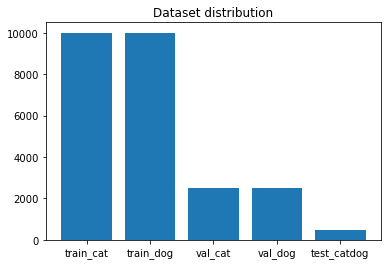

In [3]:
train_cat = os.listdir(TRAIN_PATH + "/cat")
train_dog = os.listdir(TRAIN_PATH + "/dog")
val_cat = os.listdir(VAL_PATH + "/cat")
val_dog = os.listdir(VAL_PATH + "/dog")
test_catdog = os.listdir(TEST_PATH)

x = ["train_cat", "train_dog", "val_cat", "val_dog", "test_catdog"]
height = [len(train_cat), len(train_dog), len(val_cat), len(val_dog), len(test_catdog)]
plt.bar(x = x, height = height)
plt.title("Dataset distribution")
plt.show()

In [4]:
df = pd.DataFrame(columns = ["train_cat", "train_dog", "val_cat", "val_dog", "test_catdog"])

# Extend the length of val & test datasets with NaN
max_len = max(len(train_cat), len(train_dog), len(val_cat), len(val_dog), len(test_catdog))
val_cat.extend([np.nan]*(max_len - len(val_cat)))
val_dog.extend([np.nan]*(max_len - len(val_dog)))
test_catdog.extend([np.nan]*(max_len - len(test_catdog)))

df["train_cat"] = train_cat
df["train_dog"] = train_dog
df["val_cat"] = val_cat
df["val_dog"] = val_dog
df["test_catdog"] = test_catdog

print("\n Previewing some random samples of dataset")
df.sample(20)


 Previewing some random samples of dataset


,train_cat,train_dog,val_cat,val_dog,test_catdog
5668,cat.5889.jpg,dog.4085.jpg,NaN,NaN,NaN
2473,cat.6548.jpg,dog.5916.jpg,cat.2522.jpg,dog.5859.jpg,NaN
1176,cat.306.jpg,dog.8757.jpg,cat.6063.jpg,dog.8596.jpg,NaN
5027,cat.8708.jpg,dog.10689.jpg,NaN,NaN,NaN
8149,cat.1915.jpg,dog.1577.jpg,NaN,NaN,NaN
3286,cat.4294.jpg,dog.8560.jpg,NaN,NaN,NaN
4776,cat.11324.jpg,dog.8482.jpg,NaN,NaN,NaN
473,cat.3554.jpg,dog.6659.jpg,cat.7002.jpg,dog.5594.jpg,72.jpg
8124,cat.5818.jpg,dog.11171.jpg,NaN,NaN,NaN
276,cat.11340.jpg,dog.3808.jpg,cat.10206.jpg,dog.3140.jpg,390.jpg


## Data loading & preprocessing

In [5]:
BATCH_SIZE = 32
img_height = 180
img_width = 180
CHANNELS = 3

train_ds = tf.keras.utils.image_dataset_from_directory(directory = TRAIN_PATH,
                                                        labels = "inferred",
                                                        label_mode = "int",
                                                        color_mode = "rgb",
                                                        batch_size = BATCH_SIZE,
                                                        image_size = (img_height, img_width),
                                                        shuffle = True,
                                                        seed = 10)  # For reproducibility of results

print(f"Classes: {train_ds.class_names}")

Found 20000 files belonging to 2 classes.
Classes: ['cat', 'dog']


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(directory = VAL_PATH,
                                                        labels = "inferred",
                                                        label_mode = "int",
                                                        color_mode = "rgb",
                                                        batch_size = BATCH_SIZE,
                                                        image_size = (img_height, img_width),
                                                        shuffle = True,
                                                        seed = 10)  # For reproducibility of results

print(f"Classes: {val_ds.class_names}")

Found 5000 files belonging to 2 classes.
Classes: ['cat', 'dog']


In [7]:
test_ds = tf.keras.utils.image_dataset_from_directory(directory = TEST_PATH,
                                                        labels = None,
                                                        color_mode = "rgb",
                                                        batch_size = BATCH_SIZE,
                                                        image_size = (img_height, img_width),
                                                        shuffle = True,
                                                        seed = 10)  # For reproducibility of results

Found 500 files belonging to 1 classes.


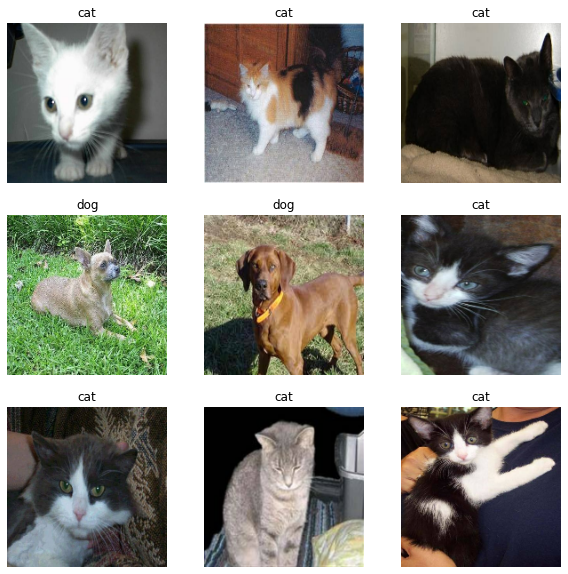

In [8]:
# Visualise some samples of training set

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

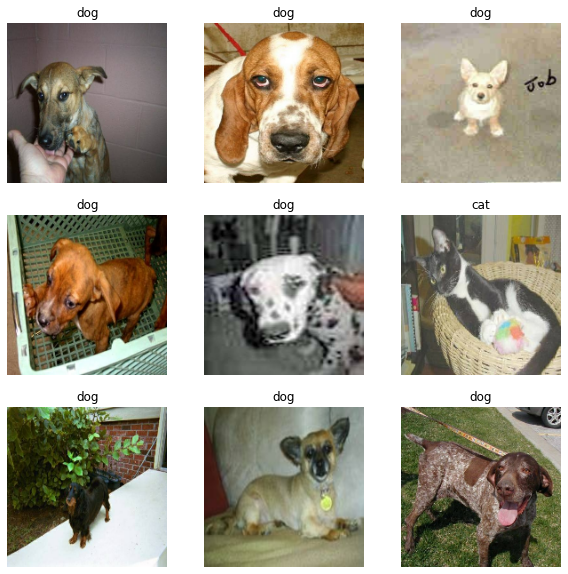

In [9]:
# Visualise some samples of validation set

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(val_ds.class_names[labels[i]])
    plt.axis("off")

# Training & Evaluation

## Data Augmentation

In [10]:
data_augmentation = tf.keras.Sequential( 
  [
    layers.RandomFlip("horizontal",
                      input_shape = (img_height,img_width, CHANNELS)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

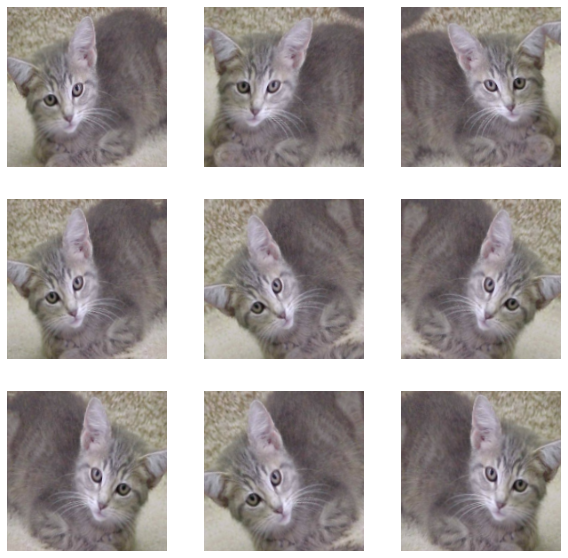

In [31]:
# Visualise some samples of augmented train_ds

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Model training

In [12]:
NUM_CLASSES = 2

catdog_model = Sequential([
                    data_augmentation,
                    layers.Rescaling(1./255),
                    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Dropout(0.2),
                    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Dropout(0.2),
                    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(NUM_CLASSES)
])

catdog_model.compile(optimizer = 'adam',
                      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                      metrics = ['accuracy'])

catdog_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

In [13]:
max_epochs = 10

callback = tf.keras.callbacks.EarlyStopping(monitor = "accuracy", 
                                            min_delta = .03,
                                            patience = 2,
                                            mode = "auto",
                                            restore_best_weights = True)

catdog_history = catdog_model.fit(x = train_ds,
                                    validation_data = val_ds,
                                    epochs = max_epochs,
                                    callbacks = [callback])

Epoch 1/10
625/625 [==============================] - 292s 466ms/step - loss: 0.6753 - accuracy: 0.5767 - val_loss: 0.6408 - val_accuracy: 0.6518
Epoch 2/10
625/625 [==============================] - 280s 448ms/step - loss: 0.5994 - accuracy: 0.6763 - val_loss: 0.5293 - val_accuracy: 0.7386
Epoch 3/10
625/625 [==============================] - 279s 446ms/step - loss: 0.5275 - accuracy: 0.7326 - val_loss: 0.4644 - val_accuracy: 0.7758
Epoch 4/10
625/625 [==============================] - 280s 448ms/step - loss: 0.4929 - accuracy: 0.7600 - val_loss: 0.4513 - val_accuracy: 0.7928
Epoch 5/10
625/625 [==============================] - 279s 447ms/step - loss: 0.4660 - accuracy: 0.7785 - val_loss: 0.4422 - val_accuracy: 0.7962
Epoch 6/10
625/625 [==============================] - 280s 448ms/step - loss: 0.4459 - accuracy: 0.7878 - val_loss: 0.4074 - val_accuracy: 0.8160
Epoch 7/10
625/625 [==============================] - 285s 456ms/step - loss: 0.4288 - accuracy: 0.7975 - val_loss: 0.4107 -

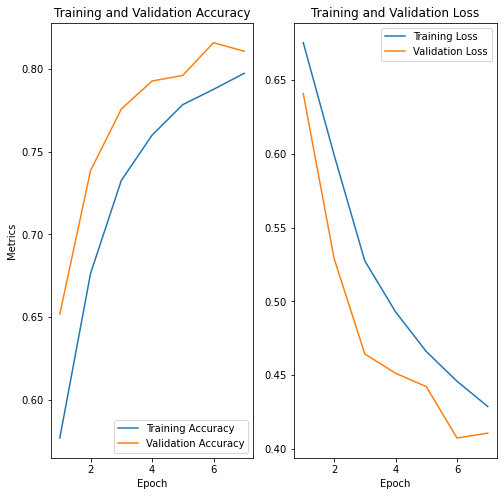

<Figure size 432x288 with 0 Axes>

In [36]:
acc = catdog_history.history['accuracy']
val_acc = catdog_history.history['val_accuracy']

loss = catdog_history.history['loss']
val_loss = catdog_history.history['val_loss']

epochs_range = range(1, len(catdog_history.history["loss"]) + 1)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Metrics")
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.xlabel("Epoch")
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig("catdog_metrics.png")

## Running inference on test dataset

In [15]:
class_names = ["cat", "dog"]
predictions = catdog_model.predict(x = test_ds)
predictions = tf.nn.softmax(predictions)
class_predictions = tf.math.argmax(predictions, axis = 1)

test_columns = ["test_image", "prediction"]
test_outcome = pd.DataFrame(columns = test_columns)
test_outcome["test_image"] = [f"../EE4483Dataset/test/{i+1}" for i in range(500)]
test_outcome["prediction"] = class_predictions

test_outcome.to_csv("catdogPredictions.csv", index = False, columns = test_columns)

***

# CIFAR-10 Image Classification

In [16]:
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

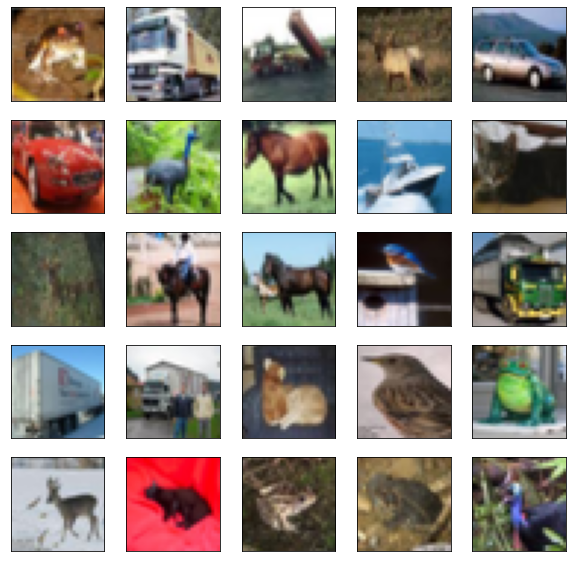

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]], color = "white")
plt.show()

In [18]:
NUM_CLASSES = 10
img_height = 32
img_width = 32

"""
Recreate the same model architecture used in the cat & dog classification
except the output layer has 10 nodes
"""
CIFAR10_model = Sequential([
                    layers.InputLayer(input_shape = (img_height, img_width, CHANNELS)),
                    layers.Rescaling(1./255),
                    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Dropout(0.2),
                    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Dropout(0.2),
                    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(NUM_CLASSES)
])

CIFAR10_model.compile(optimizer = 'adam',
                      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                      metrics = ['accuracy'])

CIFAR10_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [19]:
max_epochs = 10

callback = tf.keras.callbacks.EarlyStopping(monitor = "accuracy", 
                                            min_delta = .03,
                                            patience = 2,
                                            mode = "auto",
                                            restore_best_weights = True)

CIFAR10_history = CIFAR10_model.fit(x = train_images,
                            y = train_labels,
                            validation_data = (test_images, test_labels),
                            epochs = max_epochs,
                            callbacks = [callback])

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5404 - accuracy: 0.4391 - val_loss: 1.1965 - val_accuracy: 0.5785
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1640 - accuracy: 0.5858 - val_loss: 1.0121 - val_accuracy: 0.6440
Epoch 3/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.0273 - accuracy: 0.6382 - val_loss: 0.9610 - val_accuracy: 0.6628
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9452 - accuracy: 0.6683 - val_loss: 0.8728 - val_accuracy: 0.7032
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8891 - accuracy: 0.6875 - val_loss: 0.8660 - val_accuracy: 0.6965
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8468 - accuracy: 0.7012 - val_loss: 0.8064 - val_accuracy: 0.7232
Epoch 7/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8083 - accuracy: 0.7158 - val_loss: 0.7872 -

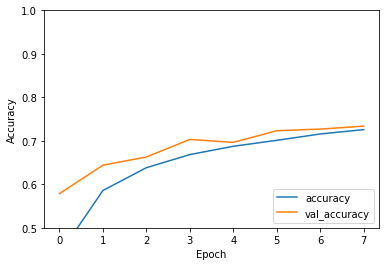

In [33]:
plt.plot(CIFAR10_history.history['accuracy'], label='accuracy')
plt.plot(CIFAR10_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [21]:
test_loss, test_acc = CIFAR10_model.evaluate(test_images,  test_labels, verbose=2)
print(f"Accuracy of inference on test dataset: {round(test_acc,3)}")

313/313 - 1s - loss: 0.8064 - accuracy: 0.7232 - 1s/epoch - 4ms/step
Accuracy of inference on test dataset: 0.723
